## Introduction to HR Analytics

HR analytics, also known as talent analytics, people analytics, or workforce analytics, entails the systematic collection and analysis of Human Resource (HR) data to enhance organizational workforce performance. This method correlates routinely collected HR data with organizational objectives, providing empirical evidence of how HR initiatives contribute to overarching goals and strategies.

## Significance of HR Analytics

Despite the availability of routine data in most organizations, specialized HR analytics is imperative due to its capacity to extract actionable insights. Simply possessing raw data is akin to having an extensive spreadsheet of numbers and words without discernible meaning. Through organization, comparison, and analysis, HR analytics elucidates crucial insights, addressing inquiries such as:

- Patterns in employee turnover
- Time taken for employee recruitment
- Investment required for employee productivity
- Prediction of employee attrition
- Evaluation of learning and development program efficacy

## The HR Analytics Process

The process of HR analytics encompasses several interdependent components:

1. **Data Collection**: Initial gathering of relevant HR data.
2. **Monitoring and Measurement**: Comparative analysis against historical data, benchmarks, or industry norms to identify trends.
3. **Analysis**: Examination of results to derive insights.
4. **Application of Insights**: Integration of findings into organizational decision-making processes.

Embarking on the analysis phase marks the culmination of these steps, enabling organizations to leverage HR analytics effectively.

# Data Preprocessing & Exploratory Data Analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Employee Performance Analysis/HR_Analytics.csv')

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [5]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
# Check missing values

print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole      

In [7]:
# descriptive statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# Removing some Unnecessary Columns:

In [8]:
df.drop(['EmployeeCount', 'EmployeeNumber','StandardHours'], axis=1, inplace=True)

# Boxplot Visualization of every Numerical Variable with respect to Employee Attrition:

<ipython-input-10-769c0eb73161>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=df, palette=palette, ax=ax)
<ipython-input-10-769c0eb73161>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=df, palette=palette, ax=ax)
<ipython-input-10-769c0eb73161>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=df, palette=palette, ax=ax)
<ipython-input-10-769c0eb73161>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

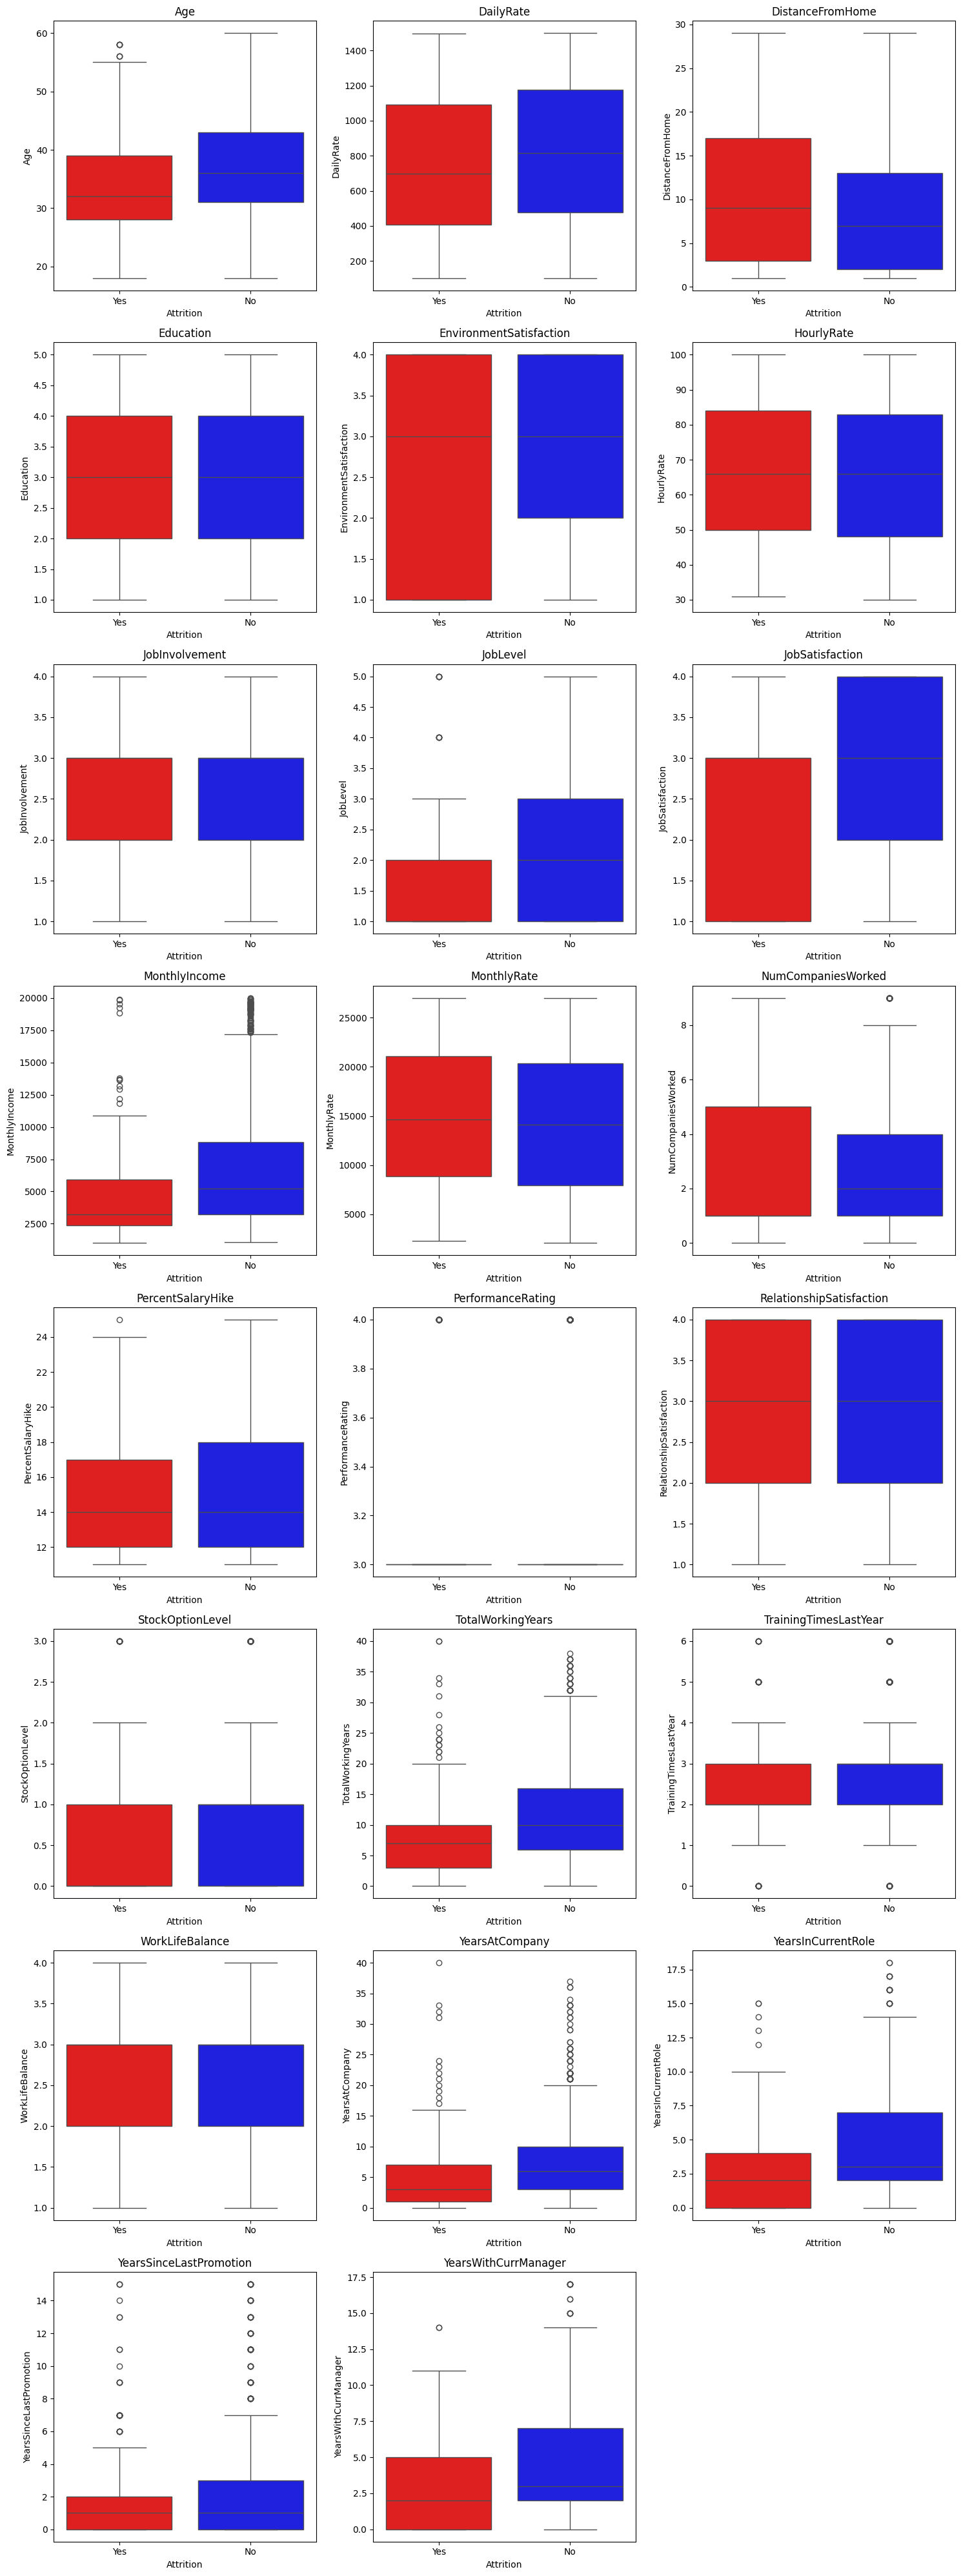

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_columns)
num_cols = 3  # Number of columns for subplots
num_rows = (num_plots - 1) // num_cols + 1  # Number of rows for subplots

# Create color palette for 'Attrition' values
palette = {'Yes': 'red', 'No': 'blue'}

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array if it's not 2-dimensional
if num_rows == 1:
    axes = axes.reshape(1, -1)
else:
    axes = axes.flatten()

# Draw boxplots for each numerical column, colored by 'Attrition' values
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    sns.boxplot(x='Attrition', y=col, data=df, palette=palette, ax=ax)
    ax.set_title(col)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Density Distribution for every variable w.r.t Employee Attrition:

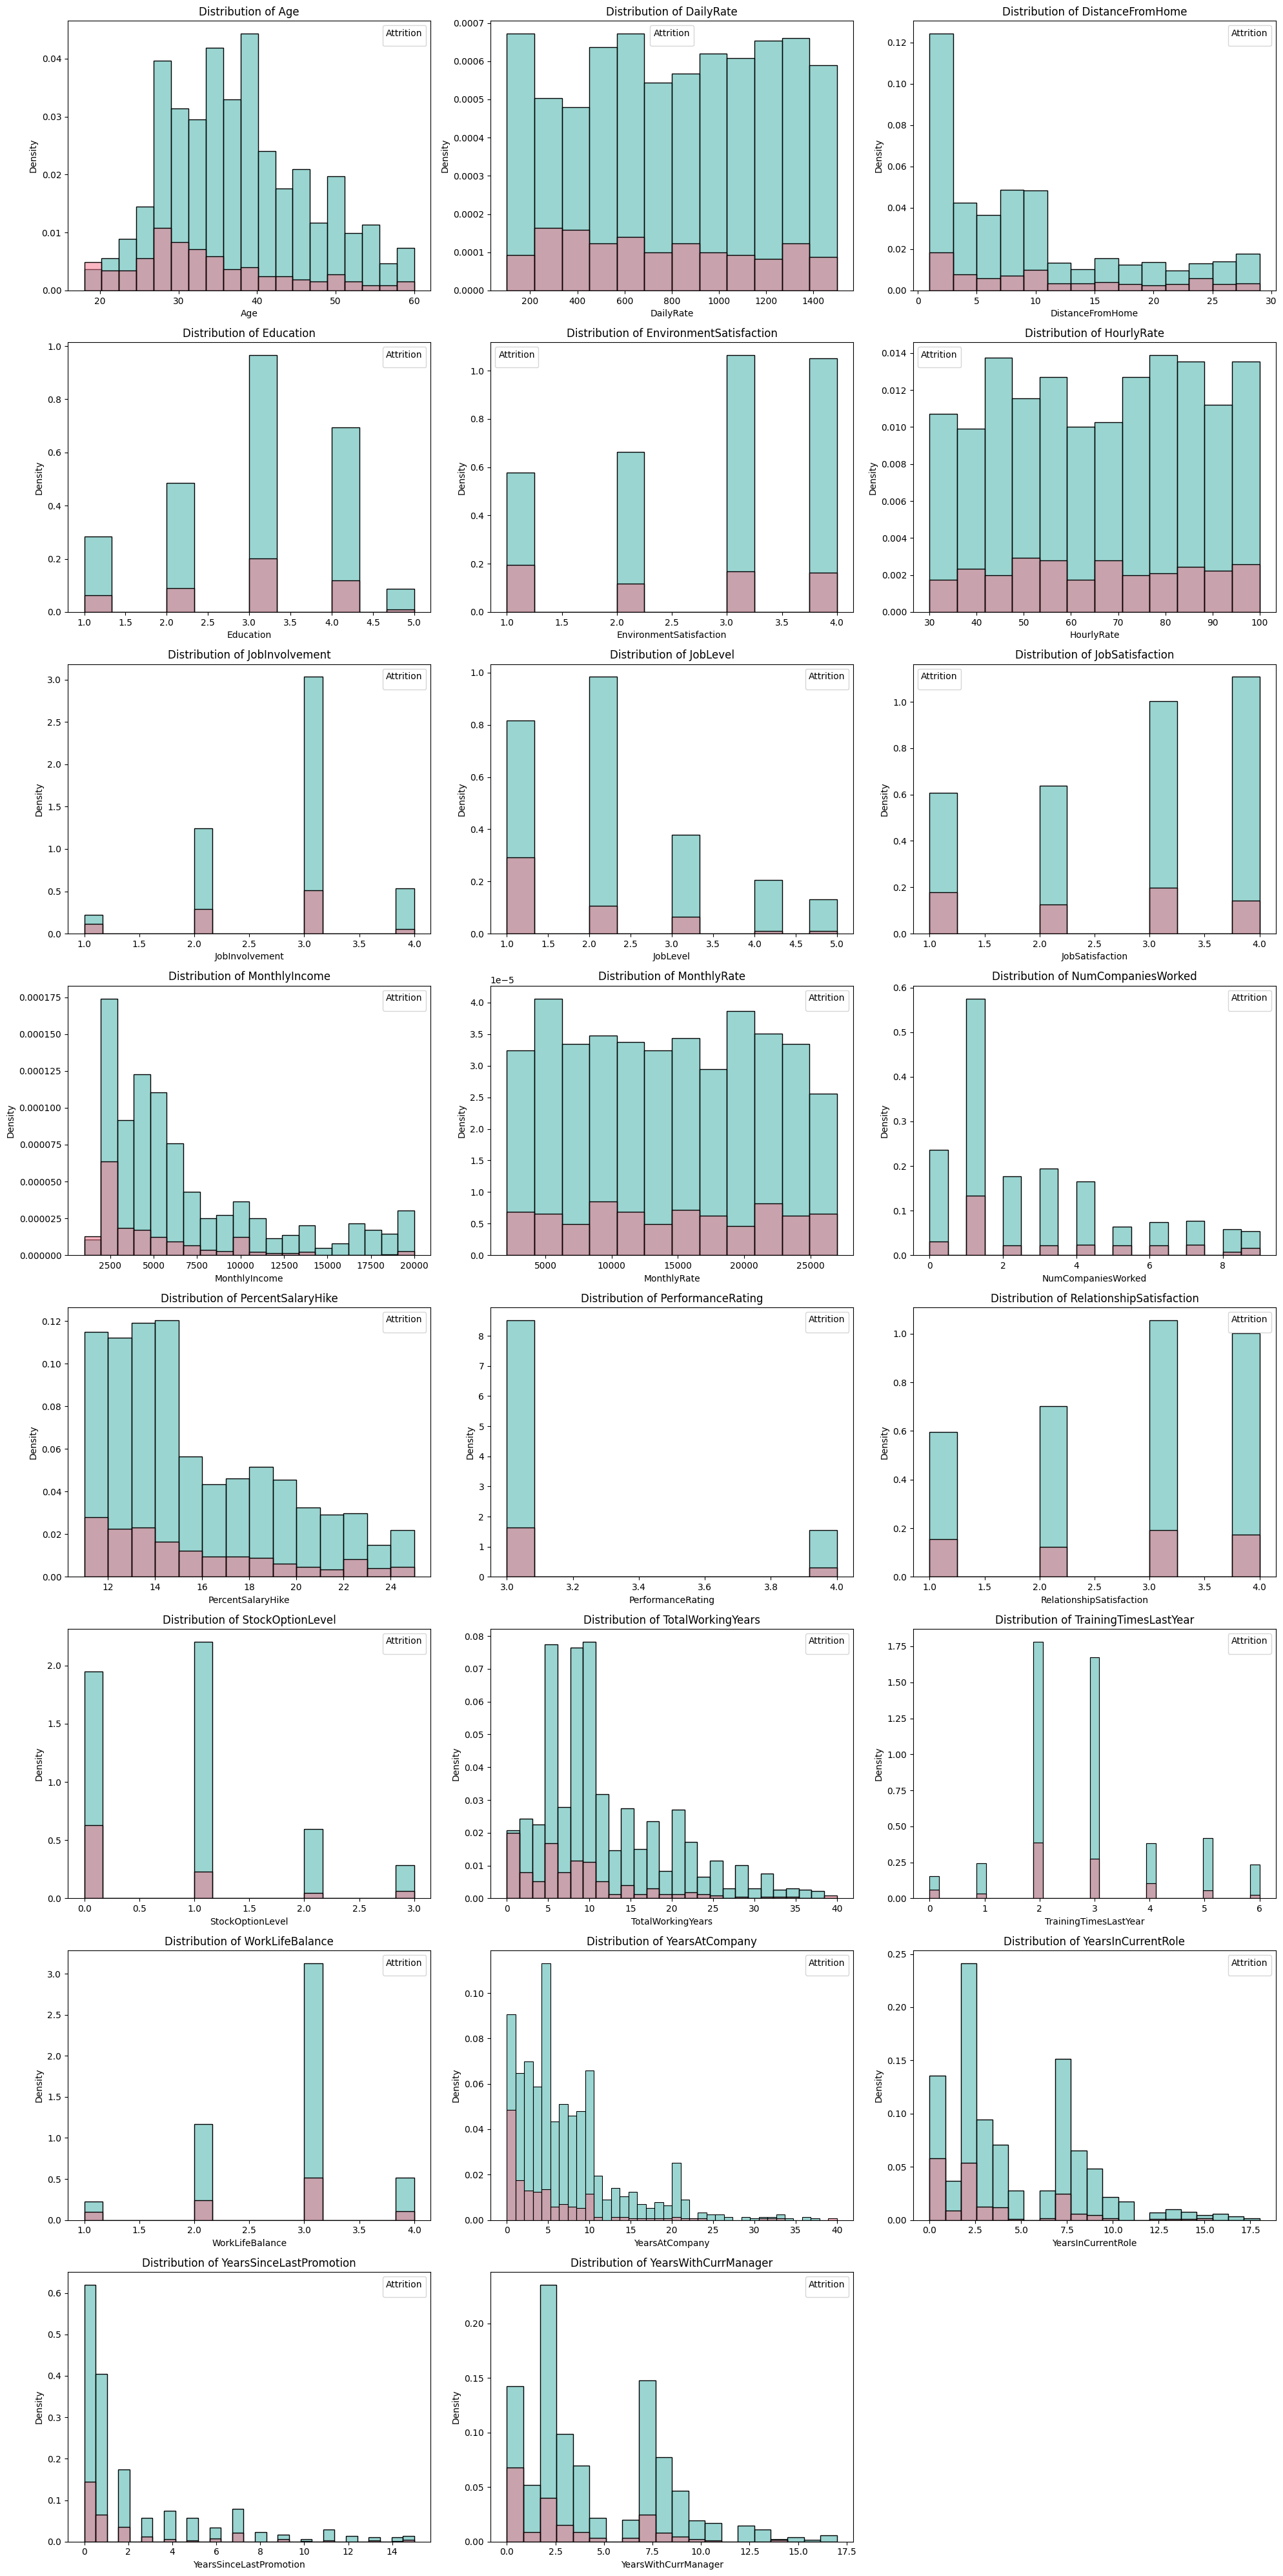

In [ ]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_columns)
num_cols = 3  # Number of columns for subplots
num_rows = (num_plots - 1) // num_cols + 1  # Number of rows for subplots

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Flatten the axes array if it's not 2-dimensional
if num_rows == 1:
    axes = axes.reshape(1, -1)
else:
    axes = axes.flatten()

# Loop through each numerical column and draw distplots for 'Yes' and 'No' distributions
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(data=df, x=col, hue='Attrition', stat='density', ax=ax, palette='husl',
                 kde=False)  # Use histograms instead of KDE
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.legend(title='Attrition')

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# Converting Yes and No to 1s and 0s in 'Attrition' column.

df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})


In [ ]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Loop through each categorical column
for column in categorical_columns:
    # Print the column name and the number of unique classes
    print(f"Column: {column}")
    print(f"Number of unique classes: {df[column].nunique()}")

    # Print the value counts for each unique class
    print("Value counts:")
    print(df[column].value_counts())

    # Add a separator for better readability
    print("-" * 30)


Column: BusinessTravel
Number of unique classes: 3
Value counts:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
------------------------------
Column: Department
Number of unique classes: 3
Value counts:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
------------------------------
Column: EducationField
Number of unique classes: 6
Value counts:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
------------------------------
Column: Gender
Number of unique classes: 2
Value counts:
Male      882
Female    588
Name: Gender, dtype: int64
------------------------------
Column: JobRole
Number of unique classes: 9
Value counts:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Man

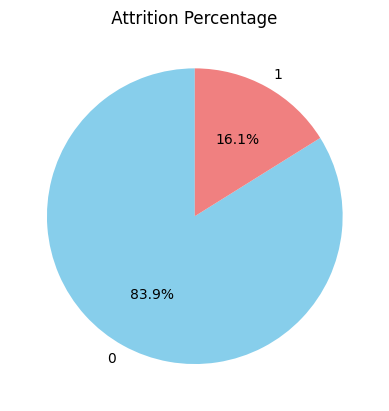

In [ ]:
# Count the occurrences of 1s and 0s in the column
value_counts = df['Attrition'].value_counts()

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

# Add a title
plt.title(' Attrition Percentage ')

# Display the pie chart
plt.show()

# Countplot of every variable w.r.t Employee Attrition:

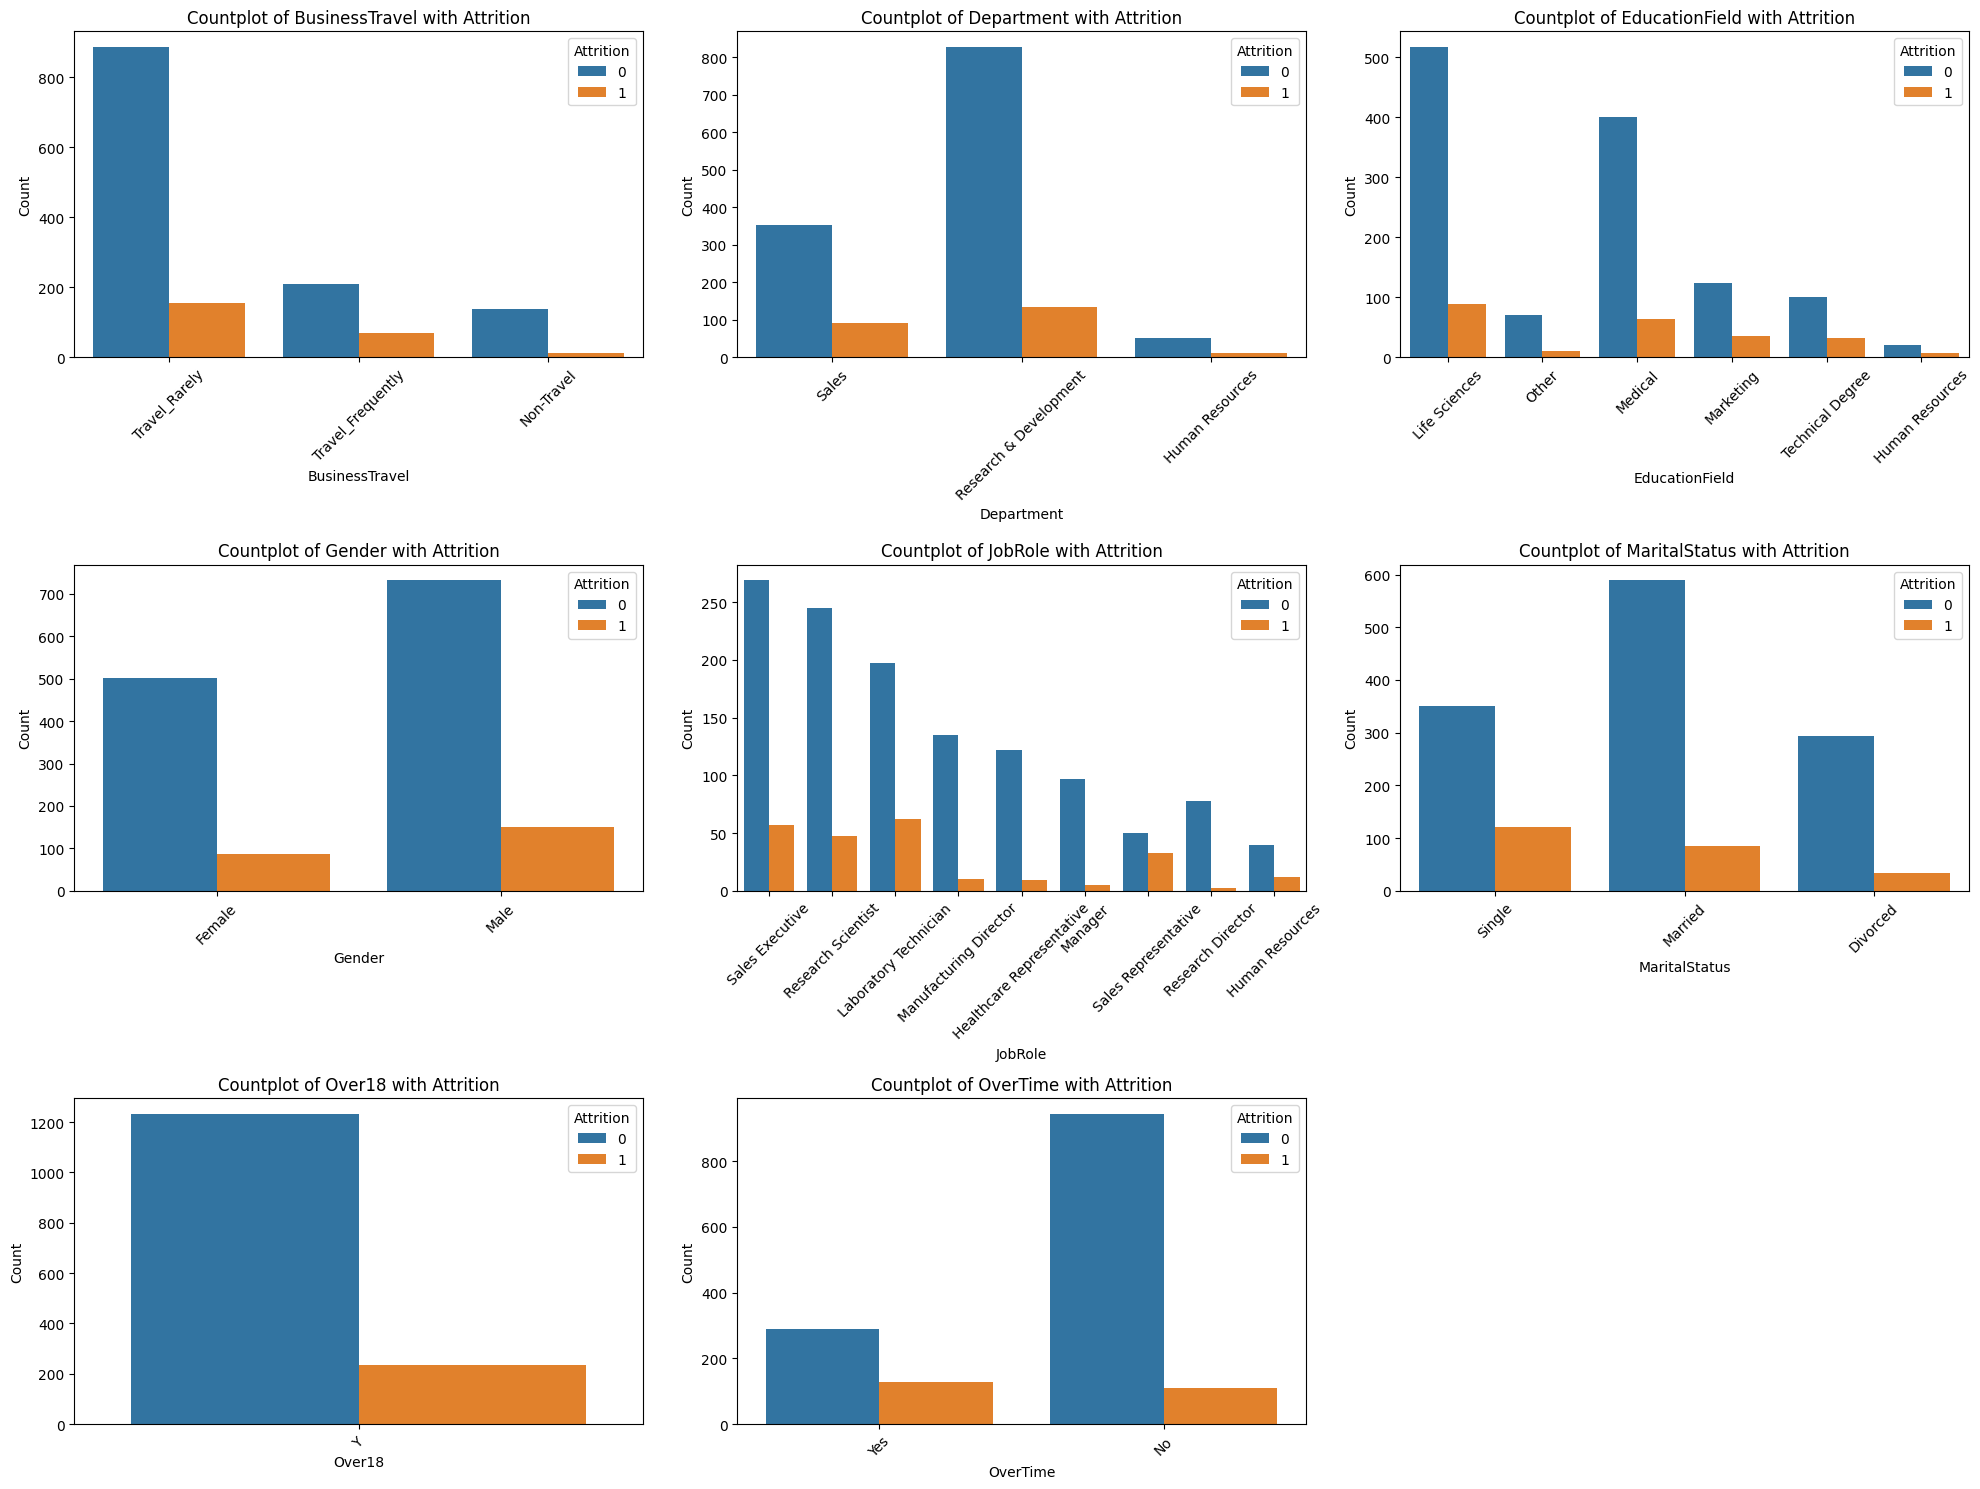

In [ ]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Calculate the number of rows and columns for subplots
num_plots = len(categorical_columns)
num_cols = 3  # Number of columns for subplots
num_rows = (num_plots - 1) // num_cols + 1  # Number of rows for subplots

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Flatten the axes array if it's not 2-dimensional
if num_rows == 1:
    axes = axes.reshape(1, -1)
else:
    axes = axes.flatten()

# Loop through each categorical column and draw countplots
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=df, x=column, hue='Attrition', ax=ax)
    ax.set_title(f'Countplot of {column} with Attrition')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Attrition', loc='upper right')

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Horizontal Barplot of every Categorical Variable against every Numerical Variables w.r.t Employee Attrition:

In [ ]:
# List of numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Loop through each numerical column
for num_col in numerical_columns:
    # Calculate the number of rows and columns for subplots
    num_plots = len(categorical_columns)
    num_cols = 3  # Number of columns for subplots
    num_rows = (num_plots - 1) // num_cols + 1  # Number of rows for subplots

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

    # Flatten the axes array if it's not 2-dimensional
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    else:
        axes = axes.flatten()

    # Loop through each categorical column and draw side-by-side bar charts
    for i, cat_col in enumerate(categorical_columns):
        ax = axes[i]
        sns.barplot(data=df, y=cat_col, x=num_col, hue='Attrition', ax=ax)
        ax.set_title(f'{cat_col} with {num_col}')
        ax.set_xlabel(num_col)
        ax.set_ylabel(cat_col)
        ax.legend(title='Attrition')

    # Remove empty subplots if any
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Kernel-Density Plots:

<ipython-input-17-d5f837b4a9b7>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[col_x], y=df[col_y], cmap="viridis", shade=True)
<ipython-input-17-d5f837b4a9b7>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[col_x], y=df[col_y], cmap="viridis", shade=True)
<ipython-input-17-d5f837b4a9b7>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[col_x], y=df[col_y], cmap="viridis", shade=True)
<ipython-input-17-d5f837b4a9b7>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[col_x], y

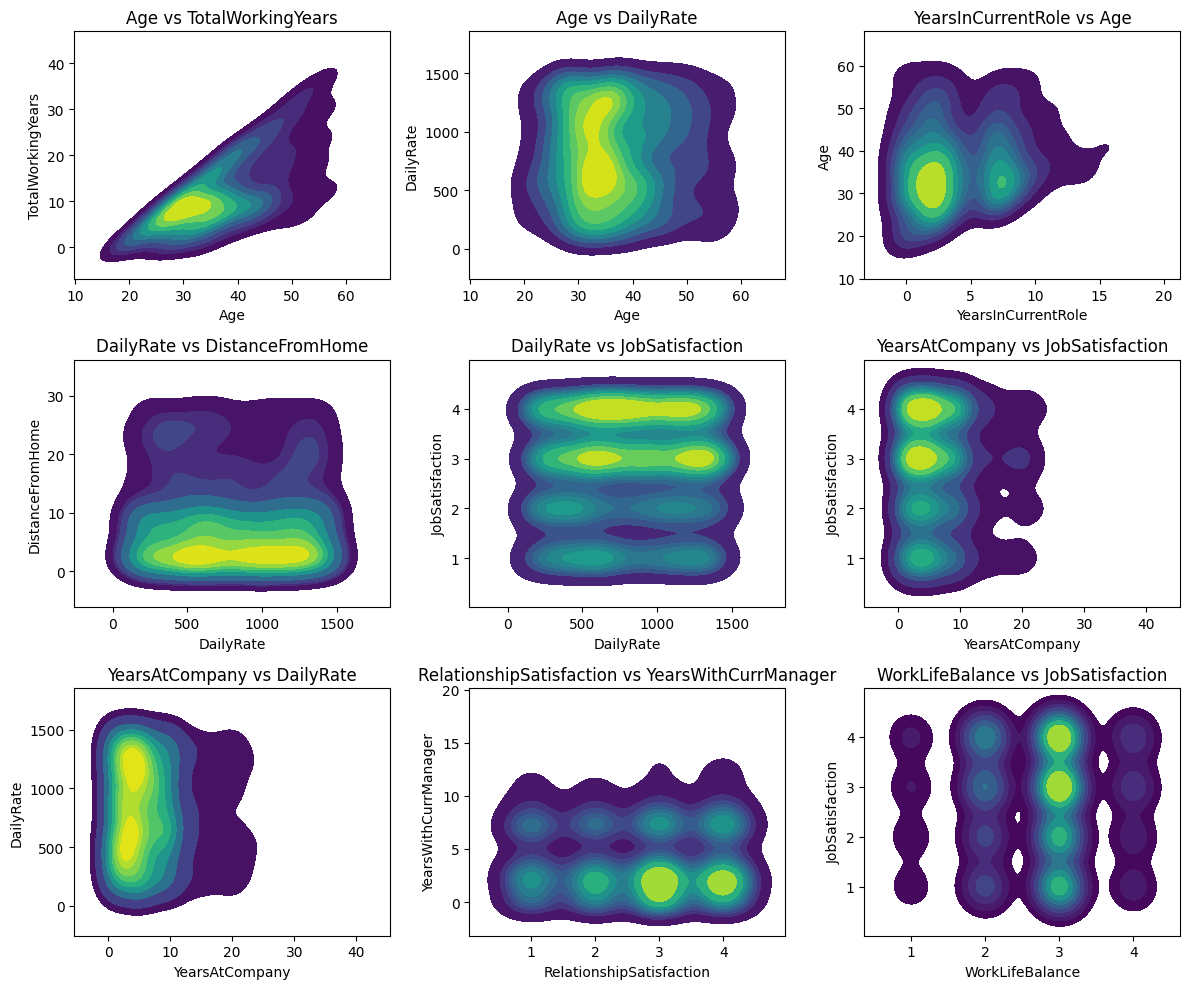

In [ ]:
# Define the pairs of columns you want to plot
columns_to_plot = [
    ('Age', 'TotalWorkingYears'),
    ('Age', 'DailyRate'),
    ('YearsInCurrentRole', 'Age'),
    ('DailyRate', 'DistanceFromHome'),
    ('DailyRate', 'JobSatisfaction'),
    ('YearsAtCompany', 'JobSatisfaction'),
    ('YearsAtCompany', 'DailyRate'),
    ('RelationshipSatisfaction', 'YearsWithCurrManager'),
    ('WorkLifeBalance', 'JobSatisfaction')
]

# Plotting the KDEplots
plt.figure(figsize=(12, 10))

for i, (col_x, col_y) in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(x=df[col_x], y=df[col_y], cmap="viridis", shade=True)
    plt.title(f'{col_x} vs {col_y}')
    plt.xlabel(col_x)
    plt.ylabel(col_y)

plt.tight_layout()
plt.show()


# Visualizing the Correlation of Every Variable with Employee Attrition:

<ipython-input-18-d65c63a976a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  attrition_correlation = df.corr()['Attrition'].drop('Attrition')
<ipython-input-18-d65c63a976a3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=attrition_correlation.index, y=attrition_correlation.values, palette="viridis_r")


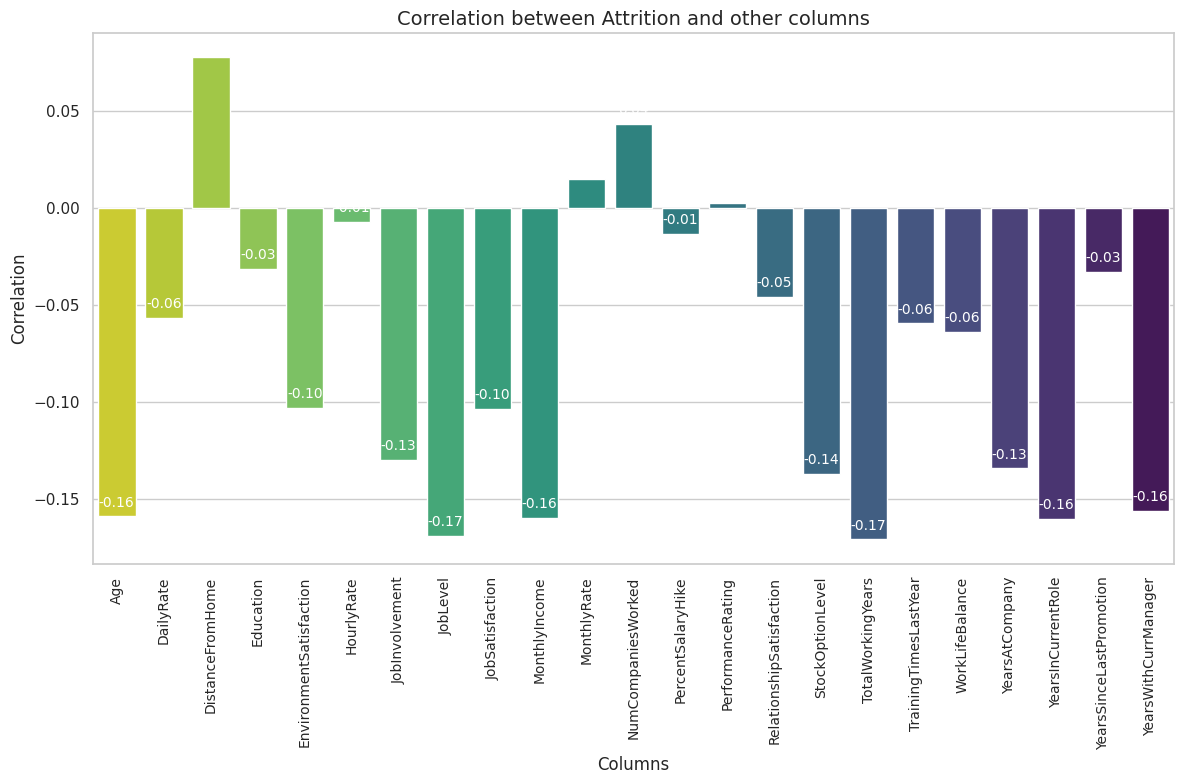

In [ ]:
# Calculate the correlation between 'Attrition' column and all other columns
attrition_correlation = df.corr()['Attrition'].drop('Attrition')

# Plot the correlation
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create reversed bar plot
ax = sns.barplot(x=attrition_correlation.index, y=attrition_correlation.values, palette="viridis_r")

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=10,
                color='white')  # Set annotation color to white

plt.title('Correlation between Attrition and other columns', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.tight_layout()
plt.show()

# Explanation:

Here's an explanation of negative and positive correlation with respect to the 'Attrition' column:

1. **Negative Correlation**:
   - In the context of the 'Attrition' column, a negative correlation with another variable means that as the value of that variable increases, the likelihood of attrition decreases, and vice versa.
   - For example, if a certain variable has a negative correlation with attrition, it implies that higher values of that variable are associated with lower rates of attrition, while lower values are associated with higher rates of attrition.
   - In practical terms, this could mean that factors contributing to employee satisfaction, engagement, or job stability are negatively correlated with attrition. For instance, higher job satisfaction scores or longer tenure might be associated with lower attrition rates.

2. **Positive Correlation**:
   - Conversely, a positive correlation between the 'Attrition' column and another variable indicates that as the value of that variable increases, the likelihood of attrition also increases, and as the value decreases, the likelihood of attrition decreases.
   - For instance, if a variable has a positive correlation with attrition, it suggests that higher values of that variable are associated with higher rates of attrition, while lower values are associated with lower rates of attrition.
   - In practical terms, this could imply that factors such as dissatisfaction, lack of engagement, or unfavorable working conditions are positively correlated with attrition. For example, lower job satisfaction scores or shorter tenure might be associated with higher attrition rates.

When interpreting the correlation values between the 'Attrition' column and other variables in the visualization:
- A positive correlation closer to 1 indicates a strong positive relationship, suggesting that an increase in that variable is strongly associated with an increase in attrition.
- A negative correlation closer to -1 indicates a strong negative relationship, implying that an increase in that variable is strongly associated with a decrease in attrition.
- Correlation values closer to 0 suggest weaker relationships, indicating less predictability in the association between that variable and attrition.

# Final Remarks:

After analyzing the data, the following observations have been inferred:

1. Early Career Transition: Individuals often switch jobs early in their careers or during the initial stages. However, once they establish stability, such as starting a family or achieving job security, they tend to remain with the same organization, typically seeking vertical advancement within.

2. Impact of Compensation: Compensation packages, including salary and stock options, significantly influence employee retention. Higher pay and more extensive stock options correlate with greater employee loyalty and reduced turnover rates.

3. Work-Life Balance: Work-life balance emerges as a pivotal motivator for employees. Paradoxically, individuals with satisfactory work-life balance may still seek better opportunities and enhanced standards of living elsewhere.

4. Influence of Departmental Dynamics: Departments emphasizing performance targets, such as Sales, exhibit higher turnover rates compared to those with a more administrative focus, such as Human Resources.

5. Job and Environment Satisfaction: Job satisfaction and positive work environments foster organizational loyalty. Conversely, dissatisfaction with current projects often prompts employees to seek opportunities elsewhere, leading to increased turnover.

# Machine Learning Modeling to Predict Employee Attrition:

# Feature Engineering:

We did One-Hot-Encoding on the Categorical Variables, Standard Scaling on the Numerical Variables and finally did Linear Discriminant Analysis to find a linear combination of all the features for the best linear discriminator for Dimensionality Reduction.

Before that we must address the issue of imbalance in our dataset. This will cause problems in our prediction after training our model. So, we will use the smote method to resample our data to become more balanced.

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Modifying the Attrition Column
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='Attrition'), df['Attrition'], test_size=0.20, random_state=42)



# Identify categorical and numerical columns
categorical_columns = x_train.select_dtypes(include=['object']).columns
numerical_columns = x_train.select_dtypes(include=['number']).columns

# Preprocessing with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns),
        ('lda', LDA(n_components=1), numerical_columns)
    ])

# Fit and transform the training set
x_train_preprocessed = preprocessor.fit_transform(x_train, y_train)

# Transform the test set
x_test_preprocessed = preprocessor.transform(x_test)

# Now x_train_preprocessed and x_test_preprocessed are ready for further processing

x_train = x_train_preprocessed
x_test = x_test_preprocessed

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)




*** Note:***
SMOTE (Synthetic Minority Over-sampling Technique) is a popular method used to address class imbalance in machine learning tasks, particularly in binary classification problems where one class (the minority class) is significantly underrepresented compared to the other class (the majority class). SMOTE works by generating synthetic samples of the minority class to balance the class distribution.

Here's how the SMOTE method works:

1. **Identify Minority Class**: First, the algorithm identifies the minority class samples in the dataset. These are the instances of the less frequent class, such as fraudulent transactions in fraud detection tasks.

2. **Select Nearest Neighbors**: For each minority class sample, SMOTE selects its k nearest neighbors in the feature space. The value of k is typically chosen based on the dataset characteristics and problem domain.

3. **Generate Synthetic Samples**: For each minority class sample, SMOTE generates synthetic samples by interpolating between the sample and its nearest neighbors. This interpolation is performed in feature space, creating new instances that are combinations of existing minority class samples.

4. **Combine Original and Synthetic Samples**: The synthetic samples are added to the original minority class samples to create a balanced dataset with a more even distribution between the minority and majority classes.

5. **Train Classifier**: Finally, the balanced dataset is used to train a classifier, such as a decision tree or neural network, to predict the target variable accurately.

By creating synthetic samples, SMOTE addresses class imbalance without duplicating existing minority class samples, thereby reducing the risk of overfitting. However, it's important to note that SMOTE may also introduce noise or outliers, especially in regions of feature space with sparse data. Additionally, SMOTE assumes that the minority class samples lie within the convex hull of their nearest neighbors, which may not hold true in all cases.

Overall, SMOTE is a valuable tool in addressing class imbalance and improving the performance of machine learning models, but it should be used judiciously and in conjunction with other techniques for robust and reliable results.

In [12]:
y_train.value_counts()

0    978
1    978
Name: Attrition, dtype: int64

# Machine Learning Models:

# 1. Logistic Regression:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.92      0.78      0.84       255
           1       0.28      0.56      0.37        39

    accuracy                           0.75       294
   macro avg       0.60      0.67      0.61       294
weighted avg       0.84      0.75      0.78       294



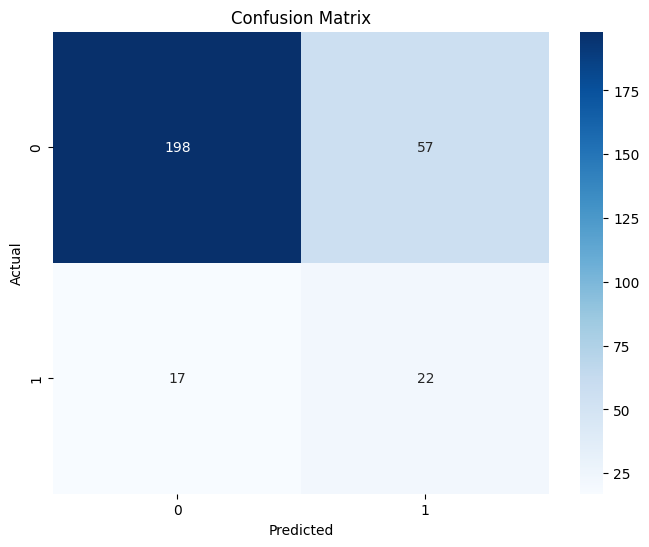

In [10]:
# train Logistic Regression with training set

from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()
LGR.fit(x_train, y_train)


# Predict New Result with test set

y_pred_LGR = LGR.predict(x_test)

# Classification Report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_LGR))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_LGR)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

Best Parameters: {'C': 100, 'class_weight': None, 'max_iter': 400, 'penalty': 'l2', 'solver': 'sag'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.77      0.84       255
           1       0.26      0.54      0.35        39

    accuracy                           0.74       294
   macro avg       0.59      0.65      0.59       294
weighted avg       0.83      0.74      0.77       294



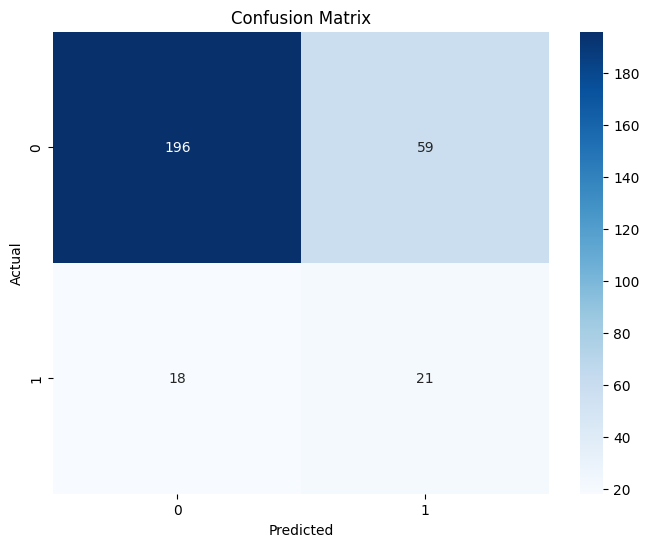

In [11]:
# Perform Grid Search to find the best parameters
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500,1000],
    'class_weight': [None, 'balanced']
}


# Perform grid search
grid_search = GridSearchCV(estimator=LGR, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_lgr_model = LogisticRegression(**best_params)

# Train the final model on the entire training set
best_lgr_model.fit(x_train, y_train)

# Predict on the future dataset
y_pred_LGR = best_lgr_model.predict(x_test)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_LGR))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_LGR)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. XGBoost Classifier:

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       255
           1       0.58      0.38      0.46        39

    accuracy                           0.88       294
   macro avg       0.74      0.67      0.70       294
weighted avg       0.87      0.88      0.87       294



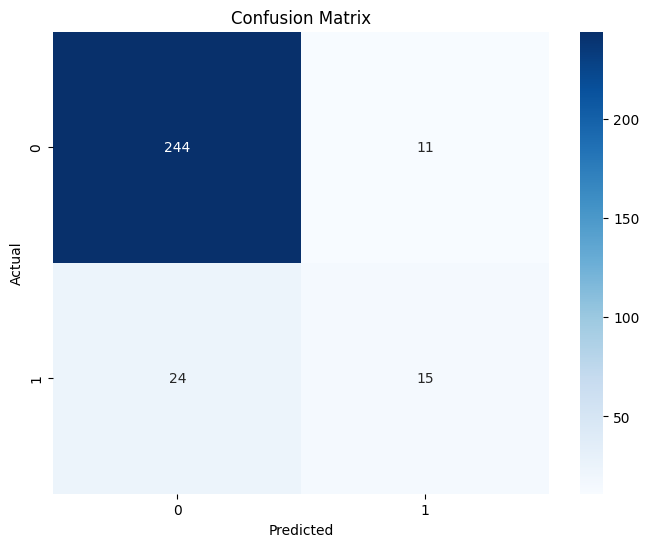

In [13]:
# Implementing XGBoost on the training set

from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(x_train, y_train)

# Predict New Result with test set

y_pred_XGBC = XGBC.predict(x_test)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_XGBC))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_XGBC)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Best Parameters: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       255
           1       0.62      0.38      0.48        39

    accuracy                           0.89       294
   macro avg       0.77      0.67      0.71       294
weighted avg       0.87      0.89      0.88       294



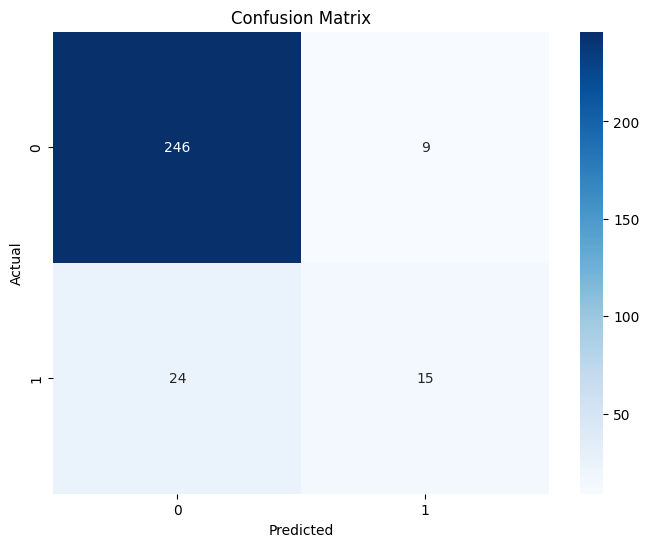

In [14]:
# Perform Grid Search to find the best parameters
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7,9,11],
    'n_estimators': [300,400,500],
    'gamma': [0, 0.1, 0.5, 1]
}

# Perform grid search
grid_search = GridSearchCV(estimator=XGBC, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_xgb_model = XGBClassifier(**best_params)

# Train the final model on the entire training set
best_xgb_model.fit(x_train, y_train)

# Predict on the future dataset
y_pred_XGBC = best_xgb_model.predict(x_test)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_XGBC))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_XGBC)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Adaboost Classifier:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       255
           1       0.41      0.38      0.39        39

    accuracy                           0.84       294
   macro avg       0.66      0.65      0.65       294
weighted avg       0.84      0.84      0.84       294



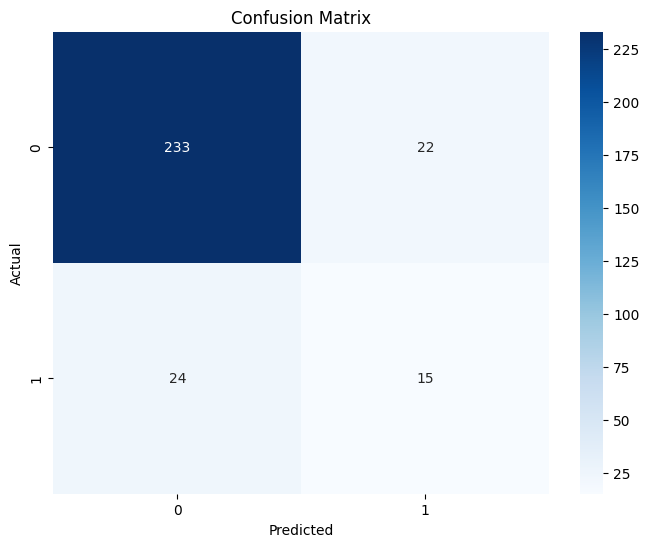

In [15]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost Classifier
abc = AdaBoostClassifier()

# Train the model on the training set
abc.fit(x_train, y_train)

# Predict on the test set
y_pred_abc = abc.predict(x_test)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_abc))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_abc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       255
           1       0.51      0.51      0.51        39

    accuracy                           0.87       294
   macro avg       0.72      0.72      0.72       294
weighted avg       0.87      0.87      0.87       294



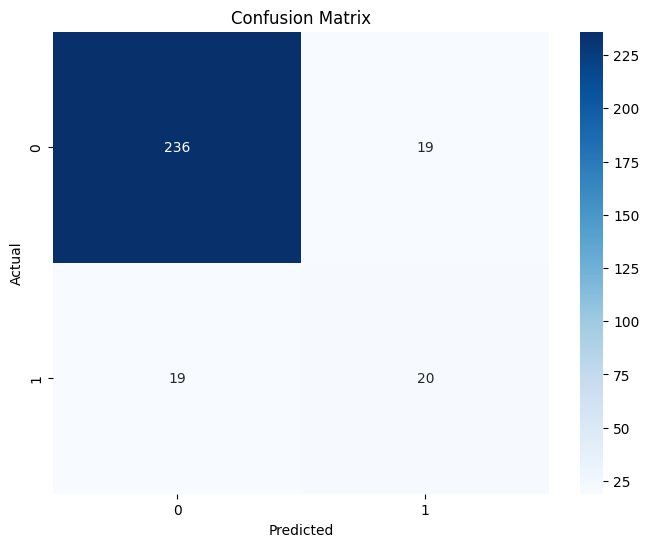

In [19]:
# Perform Grid Search to find the best parameters
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200,300,350,375,400,450,500],
    'learning_rate': [0.01, 0.1, 0.05,1.0]
}

# Perform grid search
grid_search = GridSearchCV(estimator=abc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_adaboost_model = AdaBoostClassifier(**best_params)

# Train the final model on the entire training set
best_adaboost_model.fit(x_train, y_train)

# Predict on the future dataset
y_pred_abc = best_adaboost_model.predict(x_test)


# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_abc))

# Create a heatmap of Confusion Matrix
cm = confusion_matrix(y_test, y_pred_abc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# LightGBM Model:

[LightGBM] [Info] Number of positive: 978, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7968
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.74      0.36      0.48        39

    accuracy                           0.90       294
   macro avg       0.82      0.67      0.71       294
weighted avg       0.89      0.90      0.88       294



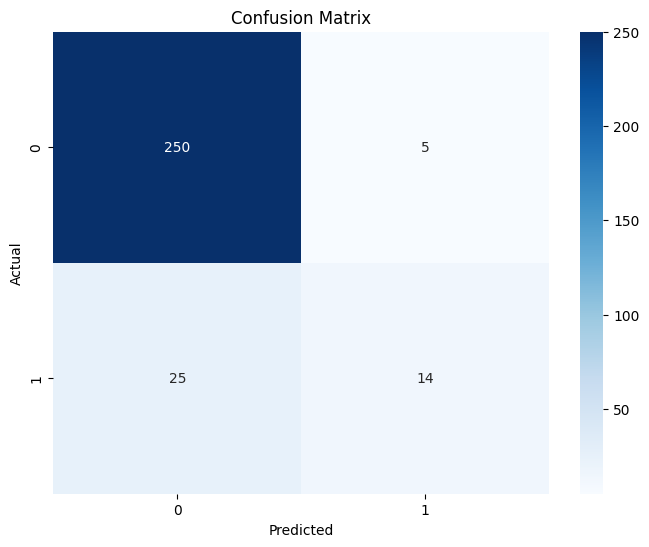

In [20]:
from lightgbm import LGBMClassifier

# Initialize the LightGBM Classifier
lgbm = LGBMClassifier()

# Train the model on the training set
lgbm.fit(x_train, y_train)

# Predict on the test set
y_pred_lgbm = lgbm.predict(x_test)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_lgbm))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_lgbm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


[LightGBM] [Info] Number of positive: 978, number of negative: 978
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7968
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

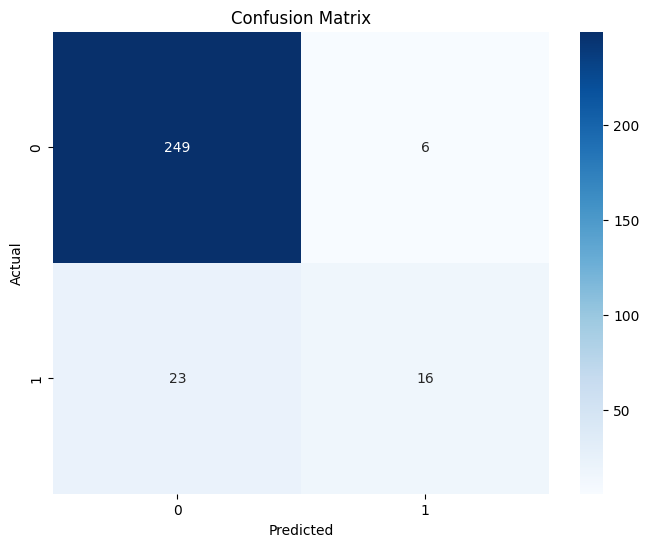

In [21]:
# Perform Grid Search to find the best parameters
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search including num_leaves
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 50],
    'n_estimators': [50, 100, 200],
    'min_child_samples': [20, 50, 100],
    'min_child_weight': [0.001, 0.01, 0.1],

}

# Perform grid search
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_lgbm_model = LGBMClassifier(**best_params)

# Train the final model on the entire training set
best_lgbm_model.fit(x_train, y_train)

# Predict on the future dataset
y_pred_lgbm = best_lgbm_model.predict(x_test)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_lgbm))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_lgbm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# 5. Random Forest:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.67      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.79      0.67      0.70       294
weighted avg       0.88      0.89      0.88       294



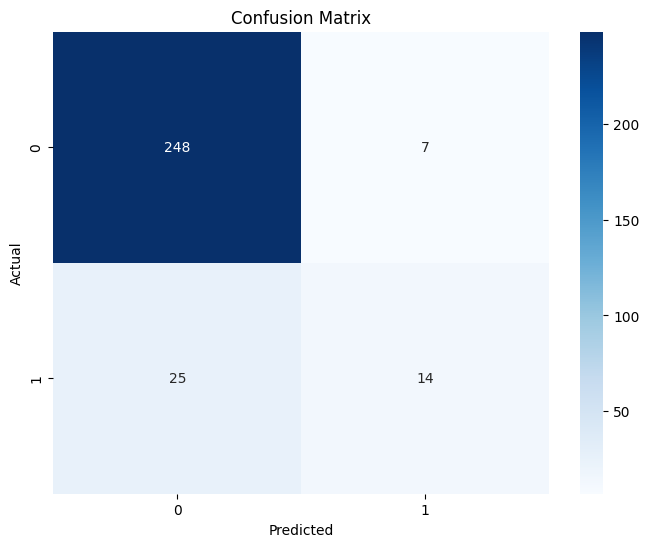

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Train the model on the training set
rf.fit(x_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(x_test)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_rf))

# Create a heatmap of Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 400}
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       255
           1       0.77      0.26      0.38        39

    accuracy                           0.89       294
   macro avg       0.83      0.62      0.66       294
weighted avg       0.88      0.89      0.87       294



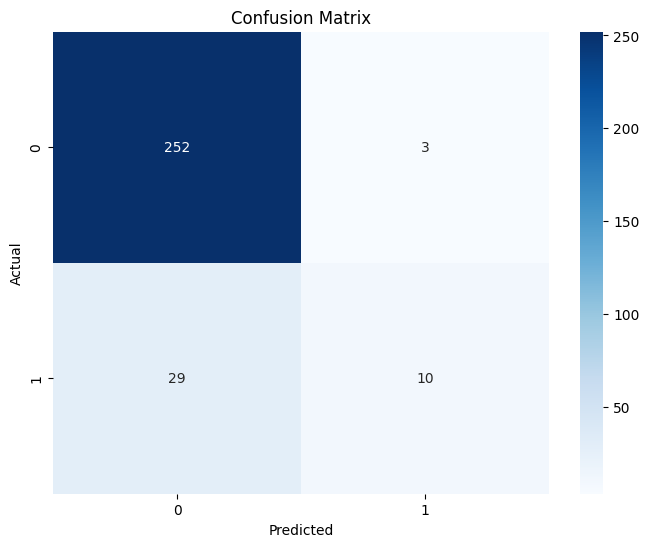

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search

param_grid = {
    'n_estimators': [300,400,500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,5, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_rf_model = RandomForestClassifier(**best_params)

# Train the final model on the entire training set
best_rf_model.fit(x_train, y_train)



# Predict on the future dataset
y_pred_rf = best_rf_model.predict(x_test)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_rf))

# Create a heatmap of Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Support Vector Machine:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       255
           1       0.44      0.44      0.44        39

    accuracy                           0.85       294
   macro avg       0.67      0.67      0.67       294
weighted avg       0.85      0.85      0.85       294



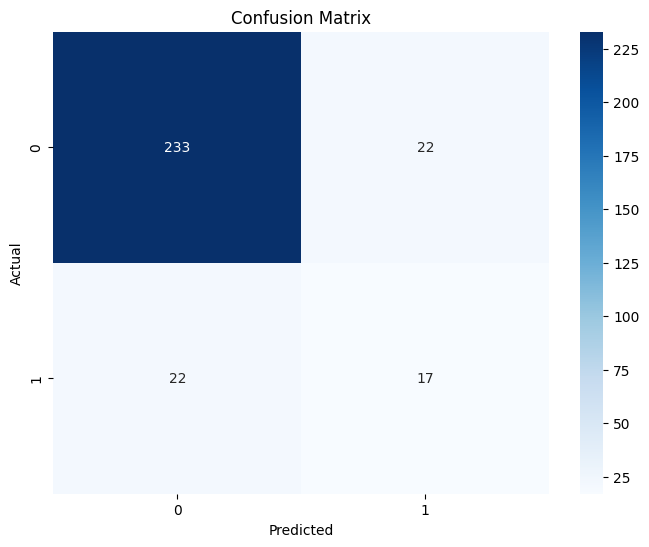

In [24]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine Classifier
svm = SVC()

# Train the model on the training set
svm.fit(x_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(x_test)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_svm))

# Create a heatmap of Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Best Parameters: {'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       255
           1       0.78      0.18      0.29        39

    accuracy                           0.88       294
   macro avg       0.83      0.59      0.61       294
weighted avg       0.87      0.88      0.85       294



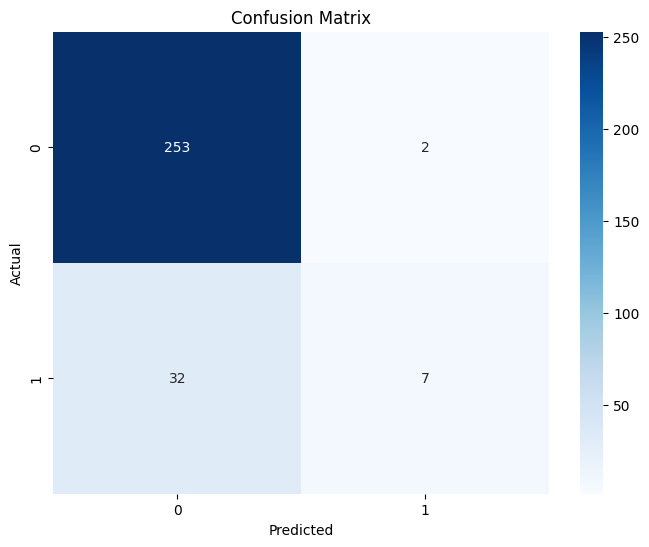

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4, 5],
    'coef0': [0.0, 0.1, 0.5]
}

# Initialize the Support Vector Machine Classifier
svm = SVC()

# Perform grid search
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_svm_model = SVC(**best_params)

# Train the final model on the entire training set
best_svm_model.fit(x_train, y_train)

# Predict on the test set
y_pred_svm = best_svm_model.predict(x_test)

# Evaluate the performance of the model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_svm))

# Create a heatmap of the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# 7. Stochastic Gradient Descent:

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       255
           1       0.31      0.67      0.42        39

    accuracy                           0.76       294
   macro avg       0.62      0.72      0.64       294
weighted avg       0.85      0.76      0.79       294



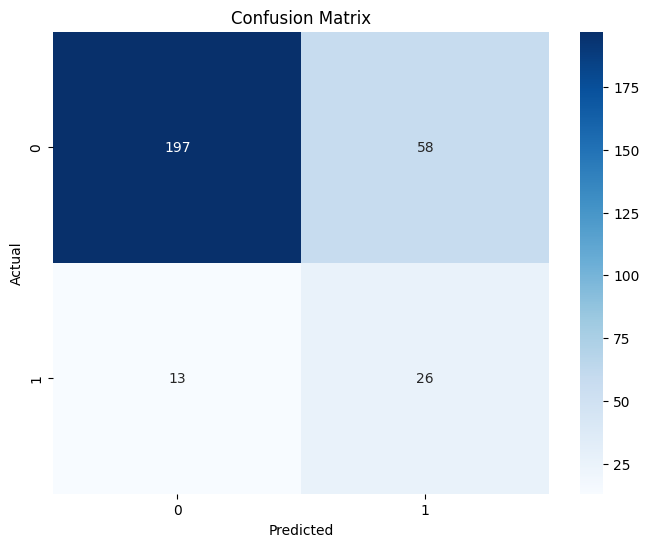

In [26]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGD Classifier
sgd = SGDClassifier()

# Train the model on the training set
sgd.fit(x_train, y_train)

# Predict on the test set
y_pred_sgd = sgd.predict(x_test)

# Evaluate the performance of the model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_sgd))

# Create a heatmap of the confusion matrix
cm = confusion_matrix(y_test, y_pred_sgd)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Best Parameters: {'alpha': 0.001, 'eta0': 1.0, 'learning_rate': 'adaptive', 'loss': 'hinge', 'penalty': 'elasticnet'}
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       255
           1       0.29      0.62      0.40        39

    accuracy                           0.75       294
   macro avg       0.61      0.69      0.62       294
weighted avg       0.84      0.75      0.78       294



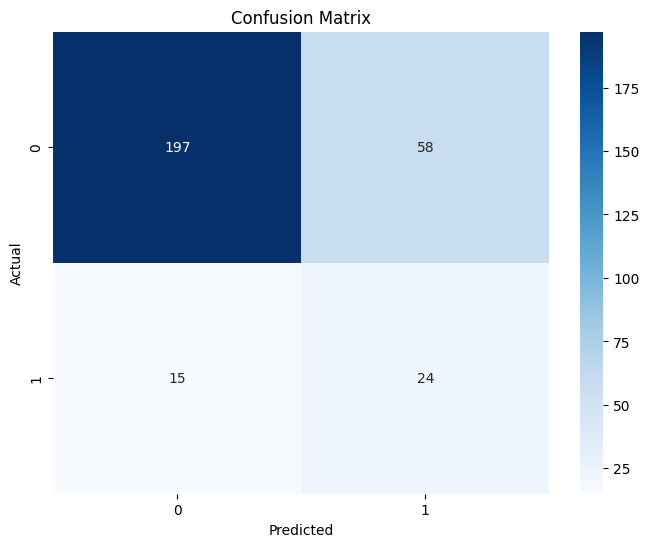

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# Define the parameter grid to search
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 0.5, 1.0],
}

# Initialize the SGD Classifier
sgd = SGDClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_sgd_model = SGDClassifier(**best_params)

# Train the final model on the entire training set
best_sgd_model.fit(x_train, y_train)

# Predict on the test set
y_pred_sgd = best_sgd_model.predict(x_test)

# Evaluate the performance of the model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_sgd))

# Create a heatmap of the confusion matrix
cm = confusion_matrix(y_test, y_pred_sgd)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Model Selection and Saving:

Based on the Recall score we selected Stochastic Gradient Descent (Without Hyperparameter Tuning) as the best model so far for this dataset.

In [28]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [29]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [30]:
import joblib

final_model_dict = {'Numeric Columns': numerical_columns,
                    'Categorical Columns': categorical_columns,
                    'Column Transformer': preprocessor,
                    'Model': best_adaboost_model}

joblib.dump(final_model_dict, 'Employee Attrition Predictor Model.joblib')

['Employee Attrition Predictor Model.joblib']

# Load The Model

In [31]:
my_model = joblib.load('Employee Attrition Predictor Model.joblib')
my_model

{'Numeric Columns': Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 'Categorical Columns': Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
        'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object'),
 'Column Transformer': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSati

In [ ]:
categorical_columns = my_model['Categorical Columns']
numerical_columns = my_model['Numeric Columns']
preprocessor = my_model['Column Transformer']
model = my_model['Model']